In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
df = pd.read_csv(r"F:\Portofolio\Analytics-Showcase\Netflix\Data\RawData\netflix1.csv")

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Preprocessing & Cleaning

## Dupicate Data

In [13]:
df.duplicated().sum()

0

In this case, the value in the dataset there is no duplicate, so we can move to the next step

## NULL VaLue

In [18]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

There is also no indicated NULL value in the dataset, so move to the next step

## Change Dtype of Column

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


If we can see, there is some suspicious Dtype on column Date and Release Year, so we must do change the Dtype to the date type

In [25]:
for col in ["date_added", "release_year"]:
    print(col, ":", df[col].unique())

date_added : ['9/25/2021' '9/24/2021' '9/22/2021' ... '5/22/2016' '9/11/2019'
 '4/1/2014']
release_year : [2020 2021 1993 2019 2013 2014 2018 1998 2010 2017 1997 1996 1975 1978
 1983 1987 2012 2001 2002 2003 2004 2011 2008 2009 2007 2005 2006 2016
 1994 2015 1982 1989 1990 1991 1999 1986 1984 1980 1961 2000 1995 1985
 1925 1992 1976 1959 1988 1981 1972 1964 1954 1979 1958 1956 1963 1970
 1973 1960 1974 1966 1971 1962 1969 1977 1967 1968 1965 1945 1946 1942
 1955 1944 1947 1943]


In [55]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [57]:
print(df["date_added"])

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
8785   2017-01-17
8786   2018-09-13
8787   2016-12-15
8788   2018-06-23
8789   2018-06-07
Name: date_added, Length: 8790, dtype: datetime64[ns]


## Standardizing Value Duration Column for Movies and TV Shows

In [60]:
print(df["type"].unique())
print(df["duration"].head())

['Movie' 'TV Show']
0      90 min
1    1 Season
2    1 Season
3      91 min
4     125 min
Name: duration, dtype: object


Disini saya melakukan splitting data pada kolom duration, karena terdapat dua tipe yakni :

- Min
- Season

Dimana Hal ini sangat berbeda konteks penggunaannya, Min ini mengacu berapa lama sebuah film berlangsung, sedangkan Season ini terdiri dari banyaknya episode dan juga setiap episode memiliki durasi jam yang berbeda-beda. Maka dari itu saya ingin melakukan splitting isi dari value data tersebut agar bisa diolah

In [63]:
#Ekstrak angka agar terpisah dari kalimat ex:(Min & Season/s)
df["duration_number"] = df["duration"].str.extract(r'(\d+)')

In [65]:
#Membuat kolom duration berdasarkan type antara Movie & TV Show, sehingga akan terpisah valuenya dan aman digunakan
df["movie_duration"] = df.apply(
    lambda row : row["duration_number"] if row["type"] == "Movie" else None,
    axis=1
)

df["tvshow_season"] = df.apply(
    lambda row : row["duration_number"] if row["type"] == "TV Show" else None,
    axis=1
)

In [66]:
df.sample(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_number,movie_duration,tvshow_season,genre_list
1488,s1716,TV Show,A Queen Is Born,Carla Barros,Brazil,2020-11-11,2020,TV-14,1 Season,"International TV Shows, Reality TV",1,None,1,"[International TV Shows, Reality TV]"
8247,s5716,TV Show,La Niña,Not Given,Colombia,2016-11-18,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",1,None,1,"[Crime TV Shows, International TV Shows, Spani..."
8656,s7969,TV Show,Secret Affair,Not Given,South Korea,2017-05-22,2014,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",1,None,1,"[International TV Shows, Korean TV Shows, Roma..."
1062,s1070,Movie,Uppena,Buchi Babu Sana,India,2021-04-14,2020,TV-14,145 min,"Dramas, International Movies, Romantic Movies",145,145,None,"[Dramas, International Movies, Romantic Movies]"
2835,s3805,Movie,The Man Who Feels No Pain,Vasan Bala,India,2019-05-22,2018,TV-14,137 min,"Action & Adventure, Comedies, International Mo...",137,137,None,"[Action & Adventure, Comedies, International M..."


Untuk memahami data durasi dengan lebih baik, saya memisahkan durasi film dan durasi acara TV ke dalam kolom yang berbeda. Hal ini penting karena:

1. Perbedaan Konteks: Durasi film (biasanya dalam menit) dan durasi acara TV (biasanya dalam musim atau episode) memiliki arti yang sangat berbeda. Menggabungkannya akan menyulitkan interpretasi.

2. Analisis: Jika digabungkan, nilai minimum dan maksimum dari fungsi describe() akan membingungkan dan bahkan bisa disalahartikan sebagai outlier (nilai aneh yang jauh berbeda dari kebanyakan data lainnya). Dengan memisahkan kolom, kita bisa mendapatkan gambaran statistik yang jelas untuk masing-masing tipe.

Meskipun pemisahan ini akan menghasilkan beberapa nilai kosong (NaN) di kolom yang tidak relevan (misalnya, durasi musim di kolom film), hal ini justru akan memudahkan analisis dan pemahaman data secara keseluruhan.


## Splitting Every Genres

In [71]:
for col in ["listed_in"]:
    print(col, ":", df[col].unique())

listed_in : ['Documentaries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies, Comedies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Children & Family Movies, Comedies, Music & Musicals'
 'Dramas, International Movies'
 'Children & Family Movies, Music & Musicals'
 'Dramas, International Movies, Music & Musicals' 'Movies' 'Comedies'
 'Docuseries, Reality TV' 'British TV Shows, Crime TV Shows, Docuseries'
 'Children & Family Movies' "Kids' TV"
 'Documentaries, International Movies'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Comedies, International Movies, Romantic Movies'
 'Horror Movies, Sci-Fi & Fantasy' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'TV Comedies' 'International TV Shows, TV Dramas, TV Thrillers'
 'Reality TV' "Anime Series, Kids' TV" "Kids' TV, Korean TV Shows"
 'Internation

In [73]:
df["genre_list"] = df["listed_in"].str.split(r',\s*')

In [75]:
genre_split = [genre for sublist in df["genre_list"] for genre in sublist]

In [77]:
unique_genres = sorted(set(genre_split))

print("Unique Genre:")
for genre in unique_genres:
    print(genre)

Unique Genre:
Action & Adventure
Anime Features
Anime Series
British TV Shows
Children & Family Movies
Classic & Cult TV
Classic Movies
Comedies
Crime TV Shows
Cult Movies
Documentaries
Docuseries
Dramas
Faith & Spirituality
Horror Movies
Independent Movies
International Movies
International TV Shows
Kids' TV
Korean TV Shows
LGBTQ Movies
Movies
Music & Musicals
Reality TV
Romantic Movies
Romantic TV Shows
Sci-Fi & Fantasy
Science & Nature TV
Spanish-Language TV Shows
Sports Movies
Stand-Up Comedy
Stand-Up Comedy & Talk Shows
TV Action & Adventure
TV Comedies
TV Dramas
TV Horror
TV Mysteries
TV Sci-Fi & Fantasy
TV Shows
TV Thrillers
Teen TV Shows
Thrillers


### Function Exploded For Count Every Genre 

Ingat bahwa disini saya akan mendeclare khusus df yang menggunakan function exploded, karena ini akan mensplitting value dari setiap genre menjadi permasing-masing baris

In [311]:
df_exploded = df.explode('genre_list')

In [313]:
genre_counts = df_exploded['genre_list'].value_counts()

In [315]:
#Menampilkan berapa banyak genre yang digunakan
print(genre_counts.head(60))

genre_list
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows            

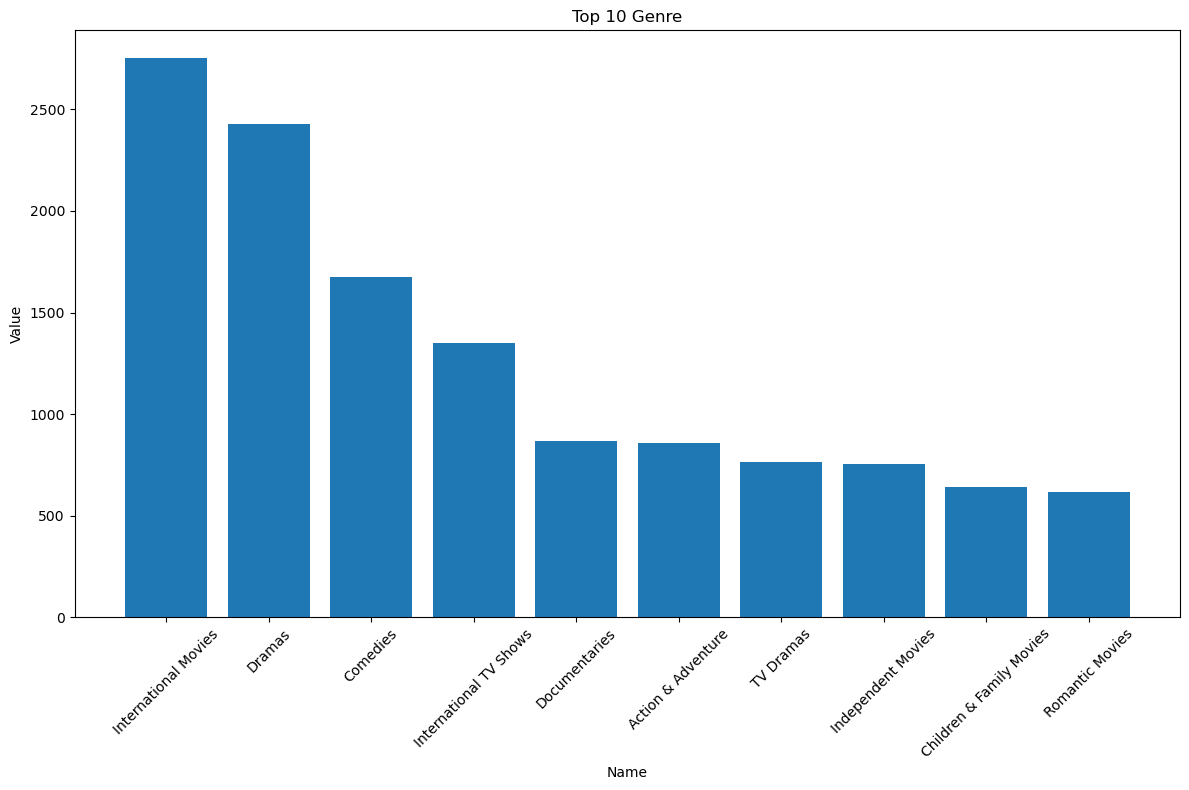

In [317]:
#Mengambil Top 10 Genre yang digunakan
top_10_genre = df_exploded["genre_list"].value_counts().head(10)

#Plottingan
plt.figure(figsize=(12,8))
plt.bar(top_10_genre.index, top_10_genre.values)
plt.title("Top 10 Genre")
plt.ylabel("Value")
plt.xlabel("Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Load Exploded Data to CSV For Analysis In PowerBI

In [249]:
df_exploded.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_number,movie_duration,tvshow_season,genre_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90,90,None,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,None,1,Crime TV Shows
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,None,1,International TV Shows
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,None,1,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,None,1,TV Dramas


In [183]:
df_exploded = df_exploded.drop(columns=["type", "director", "country", "date_added", "release_year", 
                                        "rating", "duration", "listed_in", "duration_number", "movie_duration",
                                        "tvshow_season"])

In [185]:
df_exploded.to_csv(r'F:\Portofolio\Analytics-Showcase\Netflix\Data\ProcessedData\netflix_genre_exploded.csv', index=False)

In [189]:
df_exploded.head()

,show_id,title,genre_list
0,s1,Dick Johnson Is Dead,Documentaries
1,s3,Ganglands,Crime TV Shows
1,s3,Ganglands,International TV Shows
1,s3,Ganglands,TV Action & Adventure
2,s6,Midnight Mass,TV Dramas


## Consistency Words

In [82]:
for col in ["type", "country"]:
    print(col, ":", df[col].unique())

type : ['Movie' 'TV Show']
country : ['United States' 'France' 'Brazil' 'United Kingdom' 'India' 'Germany'
 'Pakistan' 'Not Given' 'China' 'South Africa' 'Japan' 'Nigeria' 'Spain'
 'Philippines' 'Australia' 'Argentina' 'Canada' 'Hong Kong' 'Italy'
 'New Zealand' 'Egypt' 'Colombia' 'Mexico' 'Belgium' 'Switzerland'
 'Taiwan' 'Bulgaria' 'Poland' 'South Korea' 'Saudi Arabia' 'Thailand'
 'Indonesia' 'Kuwait' 'Malaysia' 'Vietnam' 'Lebanon' 'Romania' 'Syria'
 'United Arab Emirates' 'Sweden' 'Mauritius' 'Austria' 'Turkey'
 'Czech Republic' 'Cameroon' 'Netherlands' 'Ireland' 'Russia' 'Kenya'
 'Chile' 'Uruguay' 'Bangladesh' 'Portugal' 'Hungary' 'Norway' 'Singapore'
 'Iceland' 'Serbia' 'Namibia' 'Peru' 'Mozambique' 'Ghana' 'Zimbabwe'
 'Israel' 'Finland' 'Denmark' 'Paraguay' 'Cambodia' 'Georgia'
 'Soviet Union' 'Greece' 'West Germany' 'Iran' 'Venezuela' 'Slovenia'
 'Guatemala' 'Jamaica' 'Somalia' 'Croatia' 'Jordan' 'Luxembourg' 'Senegal'
 'Belarus' 'Puerto Rico' 'Cyprus' 'Ukraine']


# Explanatory Data Analysis

In [93]:
df.sample(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_number,movie_duration,tvshow_season,genre_list
7683,s3788,TV Show,Bad Blood,Not Given,Canada,2019-05-31,2019,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas",2,None,2,"[Crime TV Shows, TV Dramas]"
7596,s3599,TV Show,DC Super Hero Girls,Not Given,United States,2019-08-12,2019,TV-Y7,1 Season,Kids' TV,1,None,1,[Kids' TV]
2240,s2814,TV Show,Ken Burns Presents: College Behind Bars: A Fil...,Lynn Novick,United States,2020-03-15,2019,TV-MA,1 Season,Docuseries,1,None,1,[Docuseries]
1365,s1512,Movie,Mohamed Hussein,Muhammad Ali,Egypt,2020-12-20,2019,TV-14,96 min,"Comedies, International Movies",96,96,None,"[Comedies, International Movies]"
3938,s5501,Movie,English Babu Desi Mem,Praveen Nischol,India,2017-05-01,1996,TV-14,163 min,"Comedies, Dramas, International Movies",163,163,None,"[Comedies, Dramas, International Movies]"


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8790 non-null   object        
 1   type             8790 non-null   object        
 2   title            8790 non-null   object        
 3   director         8790 non-null   object        
 4   country          8790 non-null   object        
 5   date_added       8790 non-null   datetime64[ns]
 6   release_year     8790 non-null   int64         
 7   rating           8790 non-null   object        
 8   duration         8790 non-null   object        
 9   listed_in        8790 non-null   object        
 10  duration_number  8790 non-null   object        
 11  movie_duration   6126 non-null   object        
 12  tvshow_season    2664 non-null   object        
 13  genre_list       8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1

In [97]:
import seaborn as sns

<Axes: xlabel='type', ylabel='count'>

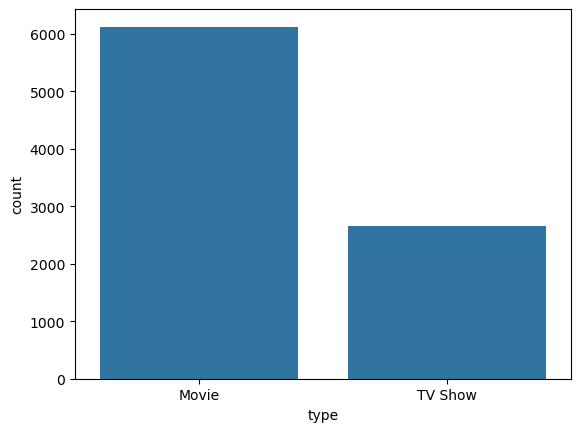

In [99]:
sns.countplot(data=df, x="type")

<Axes: xlabel='count', ylabel='country'>

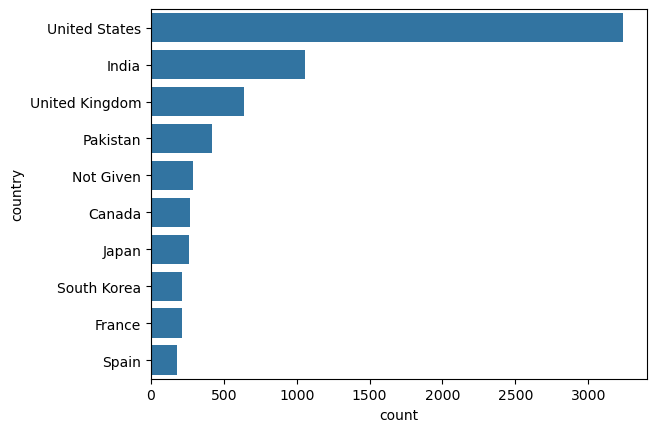

In [121]:
sns.countplot(y="country", data=df, order=df["country"].value_counts().index[:10])

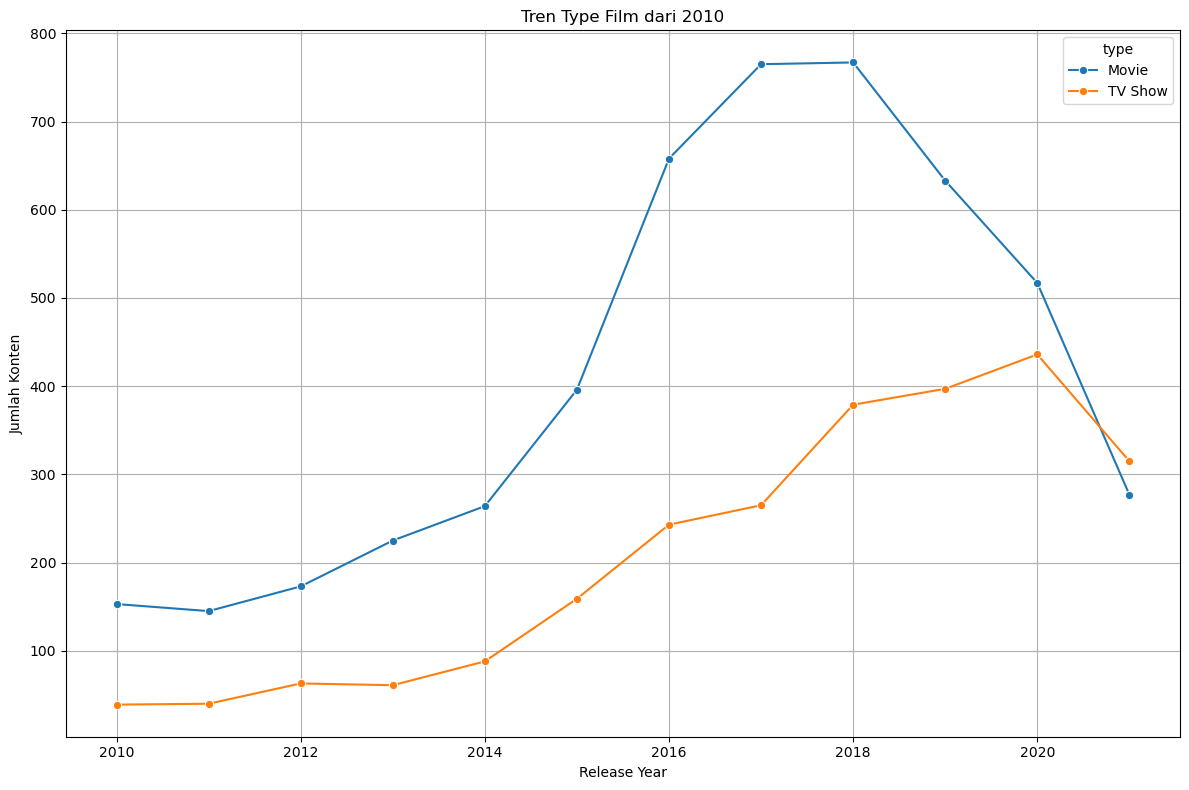

In [131]:
df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")

filtered_df = df[df["release_year"] >= 2010]

trend = filtered_df.groupby(["release_year", "type"]).size().reset_index(name="count")

plt.figure(figsize=(12,8))
sns.lineplot(data=trend, x="release_year", y="count", hue="type", marker='o')
plt.title("Tren Type Film dari 2010")
plt.xlabel("Release Year")
plt.ylabel("Jumlah Konten")
plt.grid(True)
plt.tight_layout()
plt.show()

# Load To CSV

In [137]:
import os
print(os.getcwd())


F:\Portofolio\Analytics-Showcase\Netflix\Notebooks


In [141]:
df.to_csv("../Data/ProcessedData/netflix_general_cleaned.csv", index=False)